# **Convolutional neural network (CNN) for Fashion MNIST dataset**

-  We will implement a simple CNN model with 2 convolution and 2 fully connected layers as the following figure. **conv1 --> relu1 --> pool1 ----> conv2 --> relu2 --> pool2 ----> fc1 --> fc2**




![picture](https://nasirml.files.wordpress.com/2019/01/simple_convnet-3.png?w=580&h=182)







## **Common deep learning steps**

* Step 1: Generate training and test data (and preprocess)
* Step 2: Initialize the network parameters
* Step 3: Forward propagation
* Step 4: Compute the cost/loss
* Step 5: Backpropagation or create an optimizer to minimize the cost from step 4
* Step 6: Evaluate the model with your test set


In [0]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os   # to save the checkpoint
#sess = tf.InteractiveSession()

# **Load the dataset**
* **Fashion-MNIST** is a dataset of article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It shares the same image size and structure of training and testing splits of MNIST.


* The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents.

* MNIST is very easy. Classic machine learning algorithms can also achieve 97% easily as you have see in the last lab. With convolutional nets, we can achieve 99.7% on MNIST. That is why we are trying a more serious dataset which a bit challenging but still gives us the fexibility and ease of MNIST.

* Sample images from the Fashion MNIST data in the following figure (each class takes three rows).

* 



<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Loading the dataset returns four NumPy arrays:

* The `x_train` and `y_train` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `x_test`, and `y_test` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

* Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

* **loading the dataset is very easy as it is already included in the TensorFlow/Keras library. We just have to include `tf.keras.datasets.fashion_mnist` and call the `load_data()` function.**
* It returns training and test datasets including the labels. 


In [0]:
def read_dataset():
  '''
  - read fashion mnist dataset
  - 
  '''
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  
  return x_train, y_train, x_test, y_test


In [3]:
# call the function to read fashion mnist
x_train, y_train, x_test, y_test = read_dataset()

4423680/4422102 [==============================] - 0s 0us/step


# **Look at the data**

* **Training data** — used for training the model.

* **Test data** — are the images not seen the network yet. A totally new set to test the generalization capability of the network. 



In [4]:
print('Training data size:' + str(x_train.shape))
print('Training labels size: ' + str(y_train.shape))

print('Test data size: ' + str(x_test.shape))
print('Test label size: ' + str(y_test.shape))

Training data size:(60000, 28, 28)
Training labels size: (60000,)
Test data size: (10000, 28, 28)
Test label size: (10000,)


In [5]:
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(fashion_mnist_labels)
print(y_train[100], fashion_mnist_labels[y_train[100]])

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
8 Bag


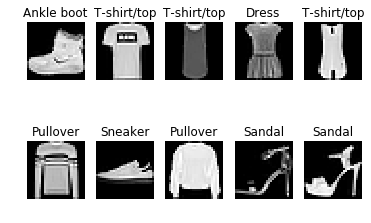

In [6]:
# look at the first 10 images
rand_img = np.array([1, 6, 1001, 100, 500, 250])
for i in range(10):
    plt.subplot(2, 5, i+1); plt.axis('off')
    plt.imshow(np.reshape(x_train[i], [28, 28]), cmap='gray')
    plt.title(fashion_mnist_labels[y_train[i]])    
plt.show()

# **Preprocess data**

* **Data normalization.** To have the pixel values in the range `[0,1]`, we divide the images with 255. This is just a standart practice in machine learning.
* **One-hot encoding.** 
* Reshape to `28 x 28x 1`
* 

In [7]:
# normalize the images
#x_train = x_train.astype('float32')/255.0
#x_test = x_test.astype('float32')/255.0 

# Convert the labels to one-hot vectors
print(y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0:5])

[9 0 0 3 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Reshape input data from (28,28) to (28, 28, 1), to 3D
# height x width x channel. we have gray scale images so channel = 1
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# **Build the CNN model**
- Make sure to define the input shape in the first layer of the neural network. 
- Rest of the layers can adjust the input and output shapes automatically
- 




---

![picture](https://nasirml.files.wordpress.com/2019/01/simple_convnet-3.png?w=580&h=182)






*   Convolutional layer (conv):
*   ReLU layer:
*   Pooling layer:
*   Dropout layer:
*   Fully connected layer (FC):




* We use `model.compile()`  to configure the learning process before training the model. 

* This is where we define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

* **Important:** before we apply the fully-connected layers, we need to flatten the the current output.

In [0]:
def create_model():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu')) # 1568*256+256 = 401664 params total
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  
  return model

In [11]:
# create the model 

model = create_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## **Model summary**

* `conv2d_3` means the convolution in 2D with `3 x 3` filters.
* Number of parameters 640 comes from `3*3*64 + 64`


In [12]:

# Take a look at the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
__________

# **Now Train our model CNN**



*  Train the model and also save the checkpoint so that we do not have to train everytime

*   Shuffle is TRUE by default. Still I include it to tell that this is very important.

*  Take around 20 minutes for 10 epochs/iterations.

* loss decreases and accuracy increases



In [13]:
'''
- more params
  - validation_split=0.1 means 10% of the training data will be used for validation set
  -
'''
n_iteration = 10
model.fit(x_train, y_train, batch_size=64, epochs=n_iteration, shuffle=True)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.7852 - acc: 0.8049
Epoch 2/10
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.3543 - acc: 0.8716
Epoch 3/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.3127 - acc: 0.8859
Epoch 4/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.2894 - acc: 0.8931
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.2710 - acc: 0.8990
Epoch 6/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.2585 - acc: 0.9041
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.2423 - acc: 0.9089
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.2293 - acc: 0.9138
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.2189 - acc: 0.9175
Epoch 10/10
60000/60000 [

# **See how the training has gone**

* Lets evaluate our model on the test set.
* Looks like our CNN model doing a pretty good job at classifying the unknown images with almost 90% accuracy with 3 iterations and  and 92% with 10 epochs!
* 

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: %f' %test_acc)

10000/10000 [==============================] - 6s 587us/sample - loss: 0.2987 - acc: 0.9002
Test accuracy: 0.900200


## **See the loss**

* Loss should decrease over time.
* If you see that the loss in your program does not decrease over time, most likely, something went wrong and you should check with your input and network initialization and hyper-parameters.
* 

10


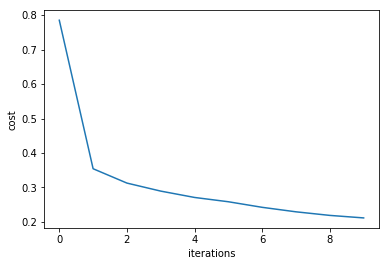

In [15]:
# history. all losses
all_loss = model.history.history['loss'] 
print(len(all_loss))

# show the training errors
plt.plot(np.squeeze(all_loss))
plt.xlabel('iterations');plt.ylabel('cost')
#plt.title('Learning rate %f' %learning_rate)
plt.show()



## **Visualize some predictions**

* Let's randomly pick some **test** images and visualize the prediction using the model we just trained. First we get the predictions with the model from the test data. Then we print out some images from the test data set, and set the titles with the prediction (and the groud truth label). If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

* As we know the accuracy is around 90%, we see that the network occasionaly makes mistakes to predict a class.

* You can convince yourself that the mistakes are somewhat reasonable.

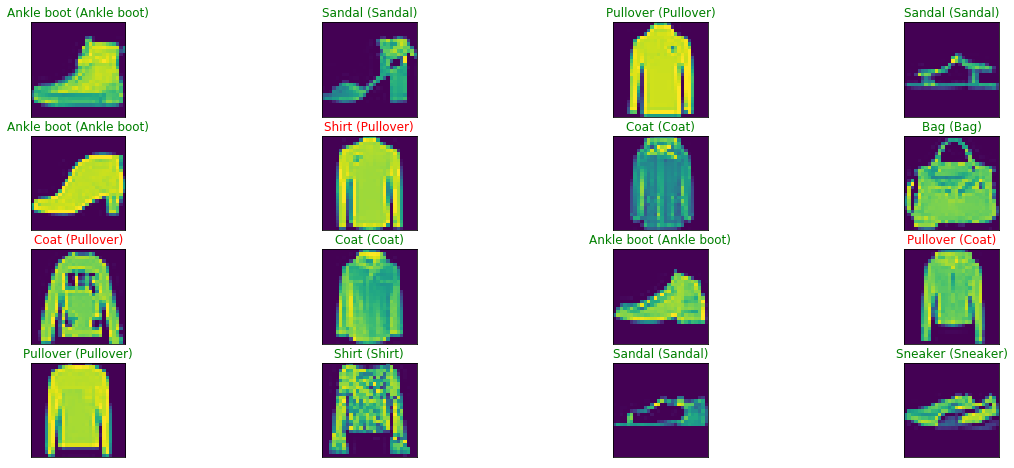

In [16]:
# find the probability of the 10 classes and then assign the class label with 
# the higher probability model.predict_classes(x_test) gives directly the class
# labels
y_hat = model.predict(x_test)

# Plot a random sample of 16 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## **TODO**


1. **Add one convolution layer** in the network and train again. See if it increases the accuracy.


2. Find the **Confusion Matrix** and see how many in each class network can predict correctly and how many do not.

3. 


